In [1]:
from plot_sankey.AutoSankey import AutoSankeyFunnel
import pandas as pd
import plotly.graph_objects as go
import io

In [2]:
raw_data = """
has_code_detected,has_code_detected_validated,has_incremental_code_detected_validated,has_code_triggerred_in_am,has_code_saved_in_am,has_code_created_from_am,has_code_created_merchandised_from_am,num_shops_ads_sellers,shops_ads_revenue
0,0,0,0,0,0,0,7253,6795728580.0996
0,0,0,0,0,1,0,49,56867403
0,0,0,0,0,1,1,145,71105987.436057
0,0,0,1,0,0,0,26,32065292
0,0,0,1,0,1,1,1,227354
0,0,0,1,1,0,0,32,13176665
0,0,0,1,1,1,0,8,2984645
0,0,0,1,1,1,1,29,37452610.36145
1,0,0,0,0,0,0,2846,7430151370.7662
1,0,0,0,0,1,0,34,74540743.053266
1,0,0,0,0,1,1,215,377775926.49892
1,0,0,0,1,1,0,1,134894
1,0,0,0,1,1,1,1,55617
1,0,0,1,0,0,0,130,301674050.8128
1,0,0,1,0,1,0,6,19022707
1,0,0,1,0,1,1,31,32671878
1,0,0,1,1,0,0,108,263667007.60353
1,0,0,1,1,1,0,36,51929814
1,0,0,1,1,1,1,150,423878710.78736
1,1,0,0,0,0,0,20,59924263
1,1,0,0,0,1,1,16,22190301
1,1,0,1,0,0,0,1,5883
1,1,0,1,0,1,1,11,24103353
1,1,0,1,1,0,0,2,759898
1,1,0,1,1,1,0,2,1957222
1,1,0,1,1,1,1,21,36445659
1,1,1,0,0,0,0,307,783919371.5673
1,1,1,0,0,1,0,12,7978629
1,1,1,0,0,1,1,53,251150680.9964
1,1,1,1,0,0,0,72,216612440.61049
1,1,1,1,0,1,0,5,5239356
1,1,1,1,0,1,1,10,27045672
1,1,1,1,1,0,0,20,95234098
1,1,1,1,1,1,0,15,31861048
1,1,1,1,1,1,1,52,496621382
"""
test = io.StringIO(raw_data)
agg = pd.read_csv(test)

In [3]:
# tb = pd.DataFrame()
# tb['landed_onsite'] = (
#     [0] * 500 + [1]*500
# )

# tb['see_sfi_upper_surfaces'] = (
#     [0] * 700 + [1]*300
# )

# tb['see_sfi_cart_checkout'] = (
#     [0] * 200 + [1]*800
# )

# tb['converted'] = (
#     [0] * 900 + [1]*100
# )
# for col in tb.columns:
#   tb[col] = tb[col].sample(frac=1).reset_index(drop=True)

# agg = tb.groupby(['landed_onsite','see_sfi_upper_surfaces','see_sfi_cart_checkout','converted']).size().reset_index()
# agg.columns = ['landed_onsite','see_sfi_upper_surfaces','see_sfi_cart_checkout','converted','count']

# agg['pct'] = (agg['count']/agg['count'].sum()) * 100

# agg = agg.sort_values(['landed_onsite','see_sfi_upper_surfaces','see_sfi_cart_checkout','converted'])
# # agg.to_csv('~/Desktop/test.csv',index=False)

In [5]:
agg.columns

Index(['has_code_detected', 'has_code_detected_validated',
       'has_incremental_code_detected_validated', 'has_code_triggerred_in_am',
       'has_code_saved_in_am', 'has_code_created_from_am',
       'has_code_created_merchandised_from_am', 'num_shops_ads_sellers',
       'shops_ads_revenue'],
      dtype='object')

In [9]:
self = AutoSankeyFunnel(
    agg_table=agg.drop('num_shops_ads_sellers', axis=1),
    metric_col='shops_ads_revenue',
    mother_node='all_shops_ads_seller'
)

In [10]:
self.layers

['has_code_detected',
 'has_code_detected_validated',
 'has_incremental_code_detected_validated',
 'has_code_triggerred_in_am',
 'has_code_saved_in_am',
 'has_code_created_from_am',
 'has_code_created_merchandised_from_am']

In [57]:
funnel_available_class_dict = {
    col:list(set(self.agg[col])) for col in self.agg.columns if col != self.metric_col
}

In [36]:
funnel_visible_class_dict = {k:1 for k,v in funnel_visible_class_dict.items()}

In [37]:
funnel_visible_class_dict

{'has_code_detected': 1,
 'has_code_detected_validated': 1,
 'has_incremental_code_detected_validated': 1,
 'has_code_triggerred_in_am': 1,
 'has_code_saved_in_am': 1,
 'has_code_created_from_am': 1,
 'has_code_created_merchandised_from_am': 1}

https://discuss.streamlit.io/t/create-inputs-widget-dynamically-and-collect-their-values/32858

In [48]:
temp = self.agg.copy()
funnel_layers = [self.mother_node]
funnel_layer_values = [self.agg[self.metric_col].sum()]
for k,v in funnel_visible_class_dict.items():
    temp = temp[temp[k]==v]
    funnel_layer_values.append(temp[self.metric_col].sum())
    funnel_layers.append('-'.join([str(k),str(v)]))

In [50]:
funnel_layer_values

[18046160513.593372,
 11036551976.696264,
 2061049257.1741898,
 1915662678.17419,
 872613996.61049,
 623716528.0,
 528482430.0,
 496621382.0]

In [51]:
funnel_layers

['all_shops_ads_seller',
 'has_code_detected-1',
 'has_code_detected_validated-1',
 'has_incremental_code_detected_validated-1',
 'has_code_triggerred_in_am-1',
 'has_code_saved_in_am-1',
 'has_code_created_from_am-1',
 'has_code_created_merchandised_from_am-1']

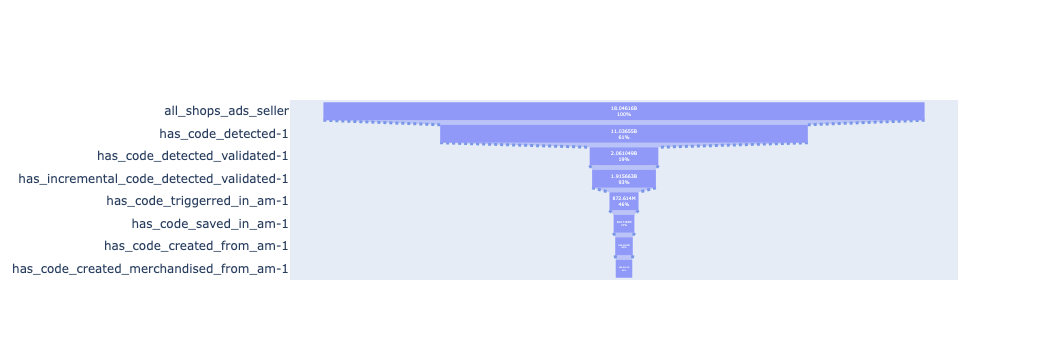

In [56]:
fig = go.Figure(go.Funnel(
    y = funnel_layers,
    x = funnel_layer_values,
    textposition = "inside",
    textinfo = "value+percent previous",
    opacity = 0.65, 
    # marker = {
    #     "color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    #     "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}
    # },
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

In [58]:
temp_dict = {}
temp_dict['d']=2

In [59]:
temp_dict

{'d': 2}